<a href="https://colab.research.google.com/github/Vermillion-1/Colab-Projects/blob/main/Cloud_Coverage_Determination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# installing and importing the necessary libraries

In [ ]:
!pip install segmentation_models_pytorch==0.2.1
!pip install rasterio
!pip install segmentation_models_pytorch
!pip install loguru
!pip install timm
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 14.6 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12402 sha256=17faecbca4701bdd000a27f38a7893080503a04f0fd8fcd372797ed35806fb8e
  Stored in directory: /root/.cache/pip/wheels/61/3a/b0/0b4c443c380bd934701b0a25e4aed76479e4fcaf1a6f955664
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=d24a859bfcdfae39053199083b491b44d8351eac2b20b2c8d9914fcc6b197249
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully bui

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, log_loss
import pickle
import pandas as pd

# loading the dataset

In [ ]:
import os
import numpy as np
from PIL import Image

image_size = (224, 224)  # define the image size you want to resize the images to
data = []  # create an empty list to store the image arrays

# loop through each folder containing images
for folder_name in os.listdir("/content/drive/MyDrive/CCD_Project/CCD DATA SET-20230310T171400Z-001/CCD DATA SET"):
    folder_path = os.path.join("/content/drive/MyDrive/CCD_Project/CCD DATA SET-20230310T171400Z-001/CCD DATA SET", folder_name)

    # loop through each image in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):  # check if the file is an image
            file_path = os.path.join(folder_path, file_name)
            image = Image.open(file_path).resize(image_size)  # open and resize the image
            image_array = np.array(image)  # convert the image to a numpy array
            data.append(image_array)  # add the array to the data list

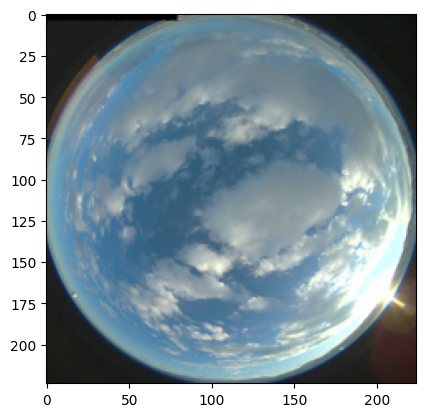

In [ ]:
import random

# get a random index within the range of the data list
random_index = random.randint(0, len(data) - 1)

# display the image at the random index
plt.imshow(data[random_index])
plt.show()


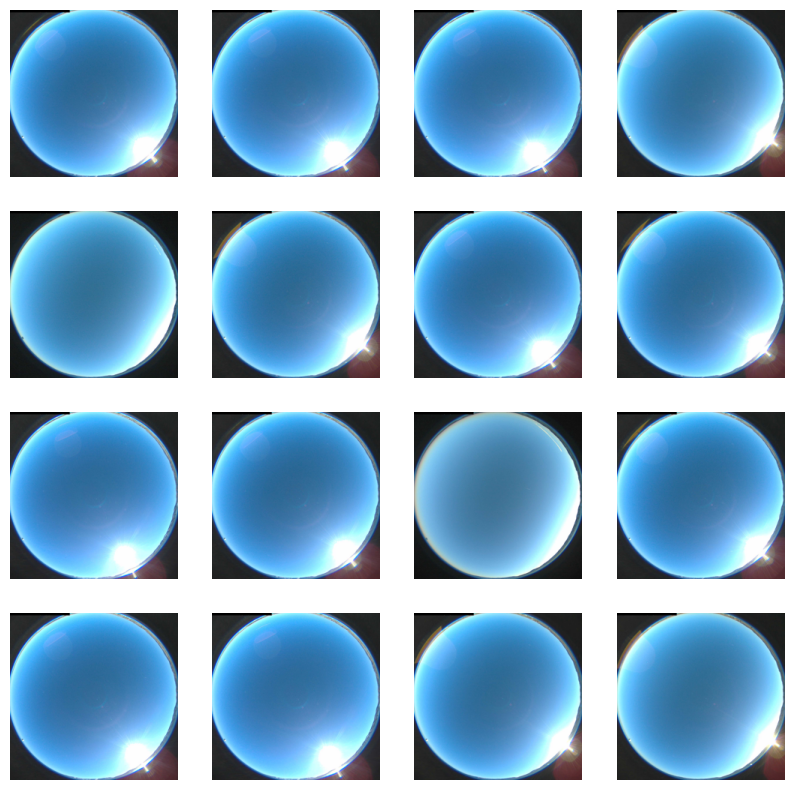

In [ ]:
# define the number of rows and columns in the grid
num_rows = 4
num_cols = 4

# create a new figure and set its size
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# loop through the rows and columns and display the images
for i in range(num_rows):
    for j in range(num_cols):
        # get the index of the image to display
        index = i * num_cols + j

        # display the image at the current index
        ax[i][j].imshow(data[index])
        ax[i][j].axis("off")

# show the figure
plt.show()


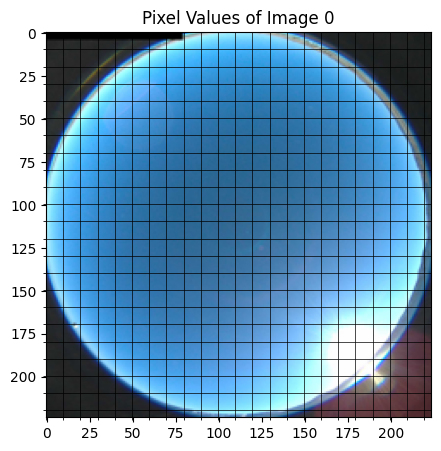

In [ ]:
# get an image from the data list
image_index = 0
image = data[image_index]

# create a new figure and set its size
fig, ax = plt.subplots(figsize=(5, 5))

# plot the pixel values of the image
ax.imshow(image)
ax.set_title(f"Pixel Values of Image {image_index}")
ax.set_xticks(np.arange(-0.5, image.shape[1], 10), minor=True)
ax.set_yticks(np.arange(-0.5, image.shape[0], 10), minor=True)
ax.grid(which="minor", color="black", linestyle="-", linewidth=0.5)

plt.show()


# splitting the model into test and train

In [ ]:
from sklearn.model_selection import train_test_split


# Assuming xtrain and ytrain are NumPy arrays
x = "/content/drive/MyDrive/CCD_Project/CCD DATA SET-20230310T171400Z-001"
y = "/content/drive/MyDrive/CCD_Project/CCD DATA SET-20230310T171400Z-002"

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# y = np.array(y)
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [ ]:
xvalid = np.array(xvalid)
yvalid = np.array(yvalid)

In [ ]:
import os
import numpy as np
from PIL import Image

# Define the image size you want to resize the images to
image_size = (224, 224)

# Create empty lists to store the image arrays and labels
train_data = []
train_labels = []
valid_data = []
valid_labels = []

# Loop through each folder containing images
for folder_name in os.listdir("/content/drive/MyDrive/CCD_Project/CCD DATA SET-20230310T171400Z-001/CCD DATA SET"):
    folder_path = os.path.join("/content/drive/MyDrive/CCD_Project/CCD DATA SET-20230310T171400Z-001/CCD DATA SET", folder_name)

    # Loop through each image in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):  # Check if the file is an image
            file_path = os.path.join(folder_path, file_name)
            image = Image.open(file_path).resize(image_size)  # Open and resize the image
            image_array = np.array(image)  # Convert the image to a numpy array

            # Split the data into training and validation sets
            if np.random.rand() < 0.8:
                train_data.append(image_array)
                train_labels.append(folder_name)
            else:
                valid_data.append(image_array)
                valid_labels.append(folder_name)

# Convert the lists to NumPy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>,
       <Axes: >], dtype=object)

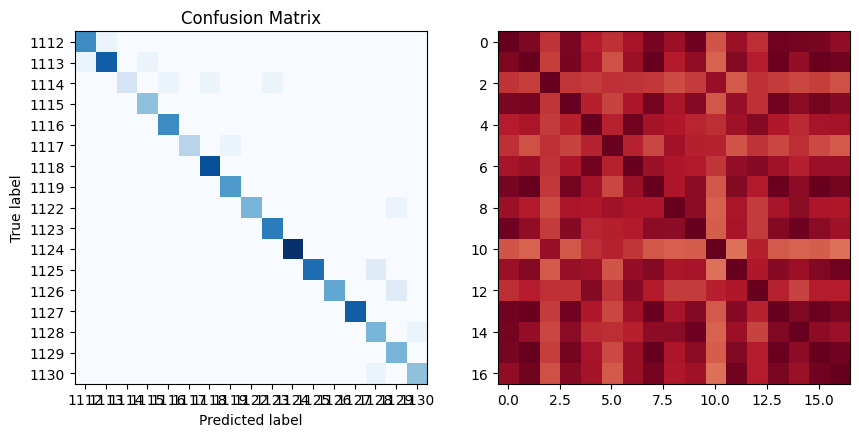

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(train_data.reshape(len(train_data), -1), train_labels)

# Make predictions on the validation data
valid_pred = clf.predict(valid_data.reshape(len(valid_data), -1))

# Create the confusion matrix
cm = confusion_matrix(valid_labels, valid_pred)

# Create the correlation matrix
cor = np.zeros((len(np.unique(train_labels)), len(np.unique(train_labels))))
for i, label1 in enumerate(np.unique(train_labels)):
    for j, label2 in enumerate(np.unique(train_labels)):
        cor[i][j] = pearsonr(train_data[train_labels == label1][0].ravel(), train_data[train_labels == label2][0].ravel())[0]

# Plot the confusion matrix and correlation matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cm, cmap="Blues")
ax[0].set_xticks(np.arange(len(np.unique(train_labels))))
ax[0].set_yticks(np.arange(len(np.unique(train_labels))))
ax[0].set_xticklabels(np.unique(train_labels))
ax[0].set_yticklabels(np.unique(train_labels))
ax[0].set_xlabel("Predicted label")
ax[0].set_ylabel("True label")
ax[0].set_title("Confusion Matrix")

im = ax[1].imshow(cor, cmap="RdBu_r", vmin=-1, vmax=1)
ax


# building the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# UNET model
def UNET(input_shape=(256, 256, 3), num_classes=2):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bridge
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    # Decoder
    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=-1)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=-1)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=-1)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=-1)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# UNET PLUS PLUS

    def UNET_PP(input_shape=(256, 256, 3), num_classes=2):
        inputs = Input(shape=input_shape)

        # Encoder
        conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
        conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
        conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

        conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
        conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

        conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
        conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
        pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

        conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
        conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

        # Decoder
        up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=-1)
        conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
        conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

        up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=-1)
        conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
        conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

        up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=-1)
        conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
        conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

        up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=-1)
        conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
        conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

        outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

# Deep Lab V3

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define the encoder
inputs = Input(shape=(256, 256, 3))

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

# Define the decoder
up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=-1)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=-1)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=-1)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=-1)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# DeepLabV3 Plus

from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model with pretrained weights
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# Freeze the weights of the pretrained ResNet50 model
for layer in resnet.layers:
    layer.trainable = False

# Define the input and output layers for the DeepLabV3+ model
inputs = layers.Input(shape=(256, 256, 3))
x = layers.experimental.preprocessing.Rescaling(scale=1./255)(inputs)
x = resnet(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='image_features')(x)

# ASPP module
x1 = layers.Conv2D(256, (1, 1), activation='relu', padding='same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(256, (3, 3), dilation_rate=6, activation='relu', padding='same')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(256, (3, 3), dilation_rate=12, activation='relu', padding='same')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(256, (3, 3), dilation_rate=18, activation='relu', padding='same')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.5)(x1)
x = layers.Concatenate()([x, x1])
x = layers.Conv2D(256, (1, 1), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Decoder module
x = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
x = layers.Concatenate()([x, resnet.get_layer('conv4_block6_out').output])
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
x = layers.Concatenate()([x, resnet.get_layer('conv3_block4_out').output])
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(x)
x = layers.Concatenate()([x, resnet.get_layer('conv2_block3_out').output])
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(x)
x = layers.Concatenate()([x, resnet.get_layer('conv1_conv').output])
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


# applying boosting model

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, log_loss

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target.astype(int)

# Split the data into train and validation sets
xtrain, ytrain = X[:60000], y[:60000]
xvalid, yvalid = X[60000:], y[60000:]

# Reshape the input data
# xtrain = xtrain.reshape(xtrain.shape[0], -1)
# xvalid = xvalid.reshape(xvalid.shape[0], -1)

# Initialize the model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
for i in range(3):
    gbm.fit(xtrain, ytrain)
    ypred = gbm.predict(xvalid)
    yprob = gbm.predict_proba(xvalid)
    acc = accuracy_score(yvalid, ypred)
    loss = log_loss(yvalid, yprob)
    print(f"Epoch {i+1}: Accuracy={acc:.4f}, Loss={loss:.4f}")


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1: Accuracy=0.9459, Loss=0.1956
Epoch 2: Accuracy=0.9458, Loss=0.1959
Epoch 3: Accuracy=0.9459, Loss=0.1954


# saving the model into a pickle file

In [ ]:
import pickle

with open('gbm.pkl', 'wb') as f:
    pickle.dump(gbm, f)

# testing the model

In [ ]:
import os
import numpy as np
from PIL import Image

image_size = (224, 224)
data = []

for folder_name in os.listdir("/content/drive/MyDrive/test_data1"):
    folder_path = os.path.join("/content/drive/MyDrive/test_data1/", folder_name)

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg"):
            file_path = os.path.join(folder_path, file_name)
            image = Image.open(file_path).resize(image_size)
            image_array = np.array(image)
            data.append(image_array)

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# List of CSV file paths
csv_files = ['test.csv']

# Intervals to calculate
intervals = [30, 60, 90, 120]

# Create a new DataFrame to store the results
results = pd.DataFrame(columns=['interval', 'prediction'])

for file_path in csv_files:
    # Read CSV file
    df = pd.read_csv('/content/drive/MyDrive/test.csv', index_col=0)

    for i in intervals:
        df.index = pd.to_datetime(df.index, unit='s')
        interval_data = df.rolling(f'{i}min').mean().fillna(method='ffill')
        # Select a single time series (e.g., the first one) to use as the endogenous variable
        endog = interval_data.iloc[:, 0]
        model = SARIMAX(endog, order=(5,1,0), seasonal_order=(0,0,0,0)) # Order can be adjusted based on data
        fit_model = model.fit(disp=False)
        predictions = fit_model.predict(start=len(interval_data), end=len(interval_data))
        result_row = {'interval': i, 'prediction': predictions[-1] / 4}
        results = results.append(result_row, ignore_index=True)

# Save results to a CSV file
results.to_csv('interval_predictions_1.csv', index=False)

<ipython-input-95-e10df2f2606f>:19: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE (MM/DD)', 'MST'], dtype='object')
  interval_data = df.rolling(f'{i}min').mean().fillna(method='ffill')
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
<ipython-input-95-e10df2f2606f>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result_row, ignore_index=True)
<ipython-inpu

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Intervals to calculate
intervals = [30, 60, 90, 120]

# Create a new DataFrame to store the results
results = pd.DataFrame(columns=['prediction'])

# Read CSV file
df = pd.read_csv('/content/drive/MyDrive/monks/test2.csv', index_col = 18)

for i in intervals:
    df.index = pd.to_datetime(df.index, unit='s')
    df = df.sort_index()  # sort index in ascending order
    interval_data = df.rolling(f'{i}min').mean().fillna(method='ffill')
    # Select a single time series (e.g., the first one) to use as the endogenous variable
    endog = interval_data.iloc[:, 0]
    model = SARIMAX(endog, order=(5,1,0), seasonal_order=(0,0,0,0)) # Order can be adjusted based on data
    fit_model = model.fit(disp=False)
    predictions = fit_model.predict(start=len(interval_data), end=len(interval_data))
    for prediction in predictions:
        result_row = {'prediction': prediction}
        result_row['prediction'] = int(result_row['prediction'])
        results = results.append(result_row, ignore_index=True)

# Save results to a CSV file
results.to_csv('interval_predictions_2.csv', index=False)

<ipython-input-101-7e078777b680>:14: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/monks/test2.csv', index_col = 18)
<ipython-input-101-7e078777b680>:19: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE (MM/DD)', 'MST', 'scenario_set'], dtype='object')
  interval_data = df.rolling(f'{i}min').mean().fillna(method='ffill')
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency inf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CCD_Project/final.csv')

df.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],...,Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),30_min,60_min,90_min,120_min
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,...,271.3,806.779,0.0,0.219,0.0,0.0,50,40,50,80
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,...,272.9,806.840,0.0,0.206,0.0,0.0,90,90,70,20
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,...,288.8,806.876,0.0,0.148,0.0,0.0,90,90,60,60
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,...,294.0,806.823,0.0,0.235,0.0,0.0,90,100,20,90
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,...,285.5,806.762,0.0,0.182,0.0,0.0,70,60,10,0


In [ ]:
new_df = df[['30_min', '60_min', '90_min', '120_min']]

new_df.head()

,30_min,60_min,90_min,120_min
0,50,40,50,80
1,90,90,70,20
2,90,90,60,60
3,90,100,20,90
4,70,60,10,0
